In [1]:
%load_ext autoreload
%autoreload 2

### Phonon Unfolding and Projection (`puppy`)

1. example situation is a silver vacancy (*V*<sub>Ag</sub>) in AgI

You can use `DOPED` to find the vacancy site if probing vacancy phonons

`pip install doped`

In [3]:
from doped.analysis import defect_from_structures
from pymatgen.core import Structure 

vacancy= defect_from_structures(
    bulk_supercell=Structure.from_file('./AgI/v_Ag/host/SPOSCAR'),
    defect_supercell=Structure.from_file('./AgI/v_Ag/defect/SPOSCAR')
)
vacancy_index = vacancy.defect_site_index
vacancy_coords = vacancy.defect_site.coords

vacancy_index,vacancy_coords

(np.int64(31), array([6.83911393, 1.31618809, 7.45983835]))

In [ ]:
from puppy.unfolder import PhononUnfoldingandProjection as Puppy
import numpy as np 
puppy = Puppy(
    supercell_directory='./AgI/v_Ag/defect/',
    host_directory='./AgI/v_Ag/host/',
    defect_site_index=vacancy_index,
    defect_site_coords=vacancy_coords,
    line_density=51,
    smatrix=np.array([[3, 0, 0], [0, 3, 0], [0, 0, 2]]),
)

find sites within a sphere of 4 ångstroms around the vacancy site

In [6]:
projected_sites = puppy.get_defect_neighbour_sites(4)
projected_sites

{'Ag': [], 'I': [66, 38, 39, 42]}

unfold the phonons with the projections 

In [7]:
_ = puppy.run_unfold(projected_sites=projected_sites['I'])

Unfolding phonons...: 100%|██████████| 459/459 [00:23<00:00, 19.46it/s]


plot the result

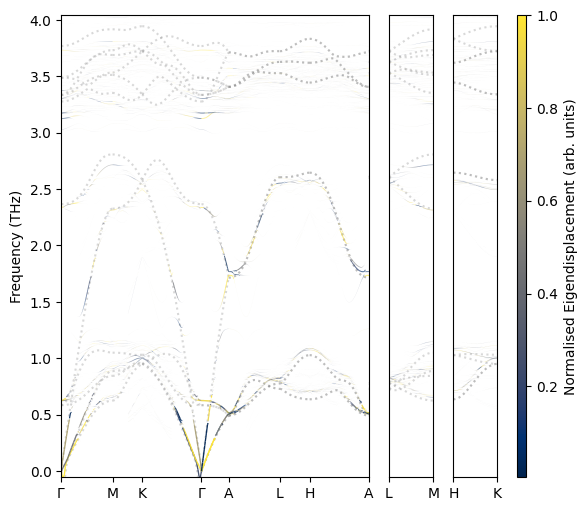

In [9]:
from puppy.plotting import PuppyPlotter 

pp = PuppyPlotter(puppy.as_dict())
fig,axes = pp.plot(dpi=100,plot_primitive=True)

In [10]:
fig.savefig('../static/unfolded.png')

### Solid Solutions and disordered cells may also be unfolded

In [ ]:
from puppy.unfolder import PhononUnfoldingandProjection as Puppy
import numpy as np 
puppy = Puppy(
    supercell_directory='./CuAg/solid_solution/',
    host_directory='./CuAg/host/',
    line_density=51,
    smatrix=np.array([[2, 0, 0], [0, 2, 0], [0, 0, 2]]),
)

In [14]:
#sites = puppy.get_all_sites() # if you want to project certain sites

In [15]:
_ = puppy.run_unfold(projected_sites=None) # or sites['Ag'] for example 

Unfolding phonons...: 100%|██████████| 306/306 [00:02<00:00, 107.43it/s]


In [16]:
from puppy.plotting import PuppyPlotter
pp = PuppyPlotter(puppy)

(<Figure size 600x600 with 3 Axes>, <Axes: >)

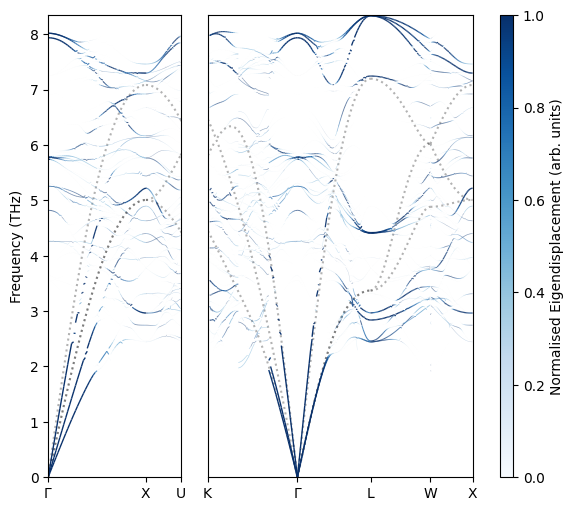

In [17]:
pp.plot(colourmap='Blues',dpi=100,plot_primitive=True,primitive_colour='black')